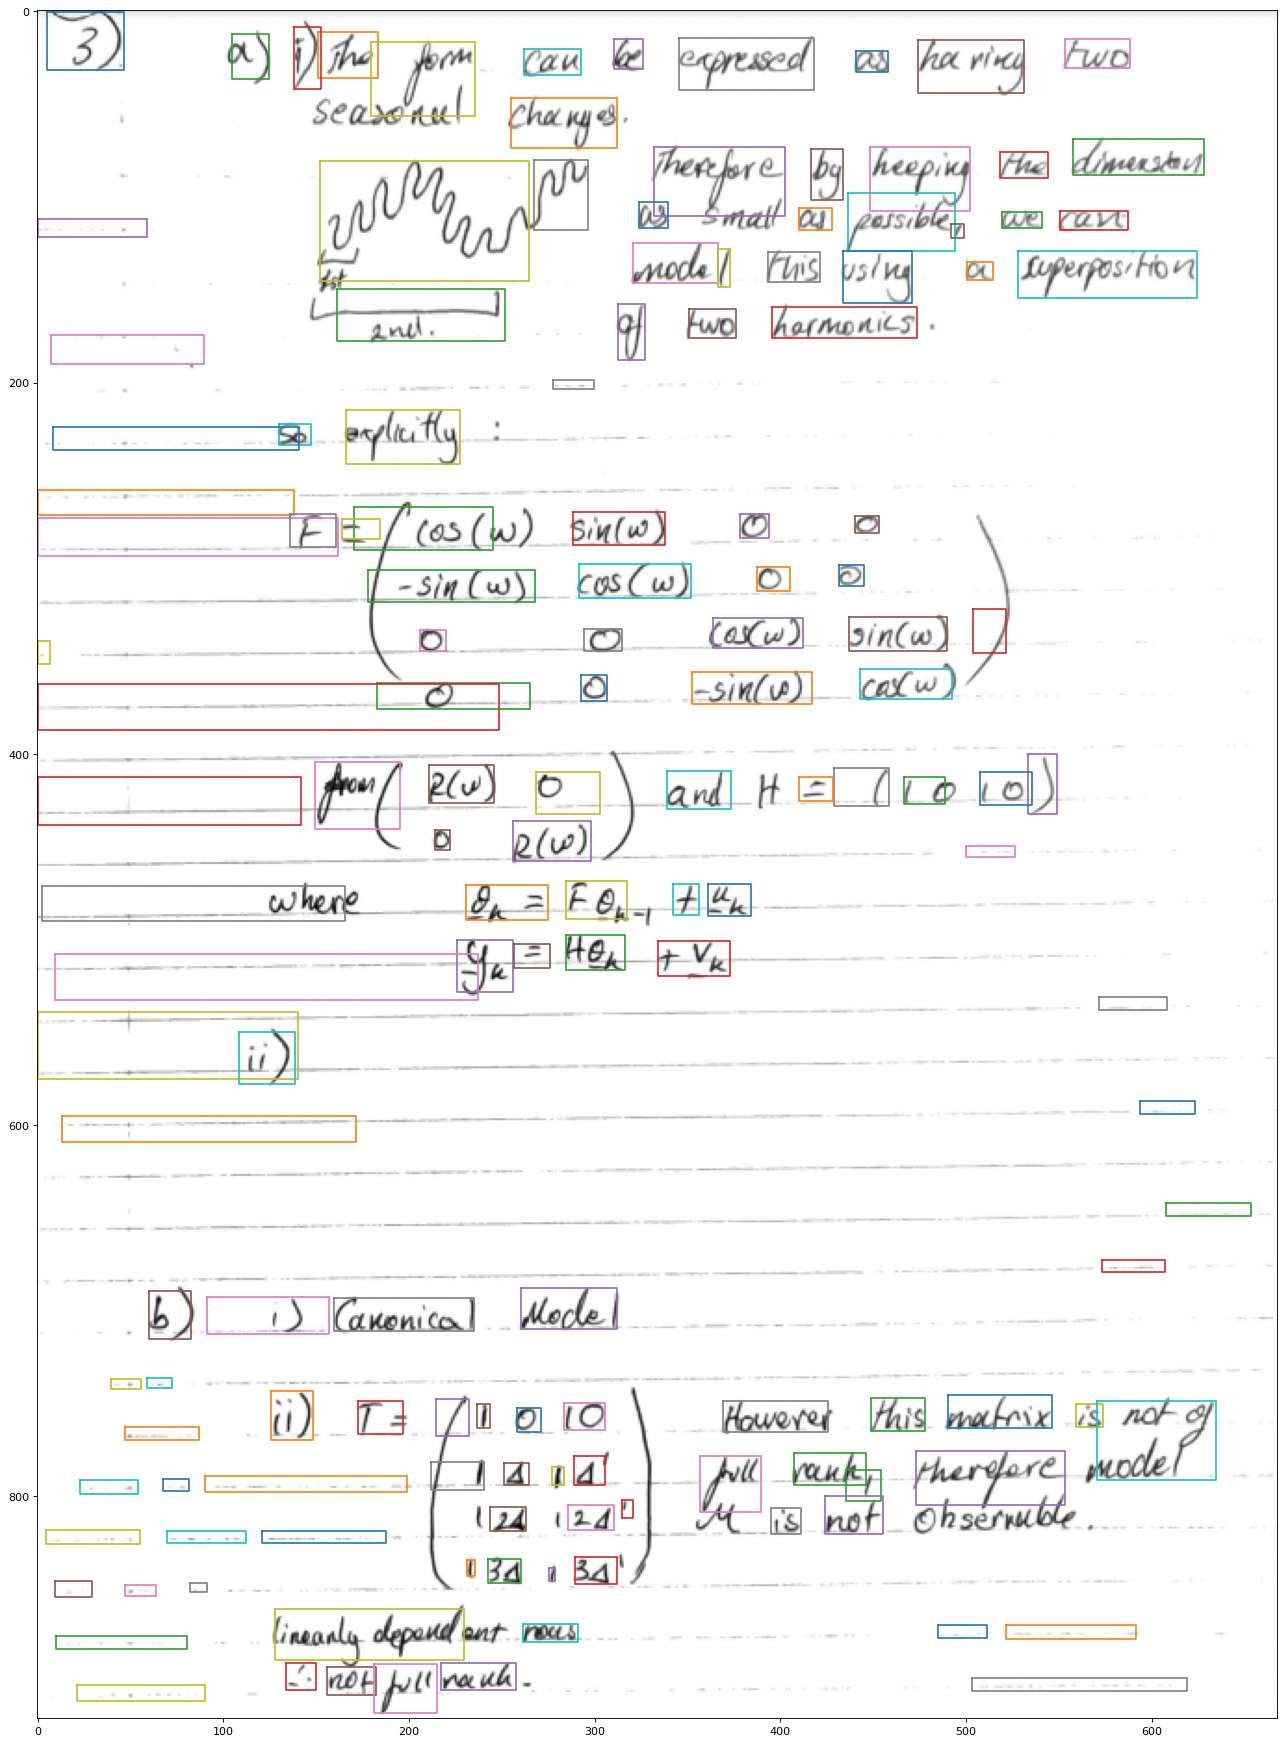

In [6]:
import torch
from path import Path
from torch._C import device

from dataloader import DataLoaderImgFile
from eval import evaluate
from net import WordDetectorNet
from visualization import visualize_and_plot
from matplotlib import pyplot as plt


def infer(device='cuda'):

    net = WordDetectorNet()
    net.load_state_dict(torch.load('../model/weights', map_location=device))
    net.eval()
    net.to(device)

    loader = DataLoaderImgFile(Path('../data/test'), net.input_size, device)
    res = evaluate(net, loader, max_aabbs=1000)

    for i, (img, aabbs) in enumerate(zip(res.batch_imgs, res.batch_aabbs)):
        f = loader.get_scale_factor(i)
        aabbs = [aabb.scale(1 / f, 1 / f) for aabb in aabbs]
        img = loader.get_original_img(i)
        visualize_and_plot(img, aabbs)
plt.figure(figsize=(20, 30), dpi=80)
infer(device='cpu')